In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
%matplotlib inline 

Using TensorFlow backend.


In [2]:
#IdLookupTable = pd.read_csv('IdLookupTable.csv')
#IdLookupTable.info()

In [3]:
#IdLookupTable.head()

In [4]:
#SampleSubmission = pd.read_csv('SampleSubmission.csv')
#SampleSubmission.head()

In [5]:
#SampleSubmission.info()

In [6]:
test = pd.read_csv('test.csv')
#test.info()

In [7]:
#test.head()

In [8]:
training = pd.read_csv('training.csv')
#training.info()

In [9]:
#training.head(3)

In [10]:
training = training.dropna()

In [11]:
training.shape, type(training)

((2140, 31), pandas.core.frame.DataFrame)

In [12]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

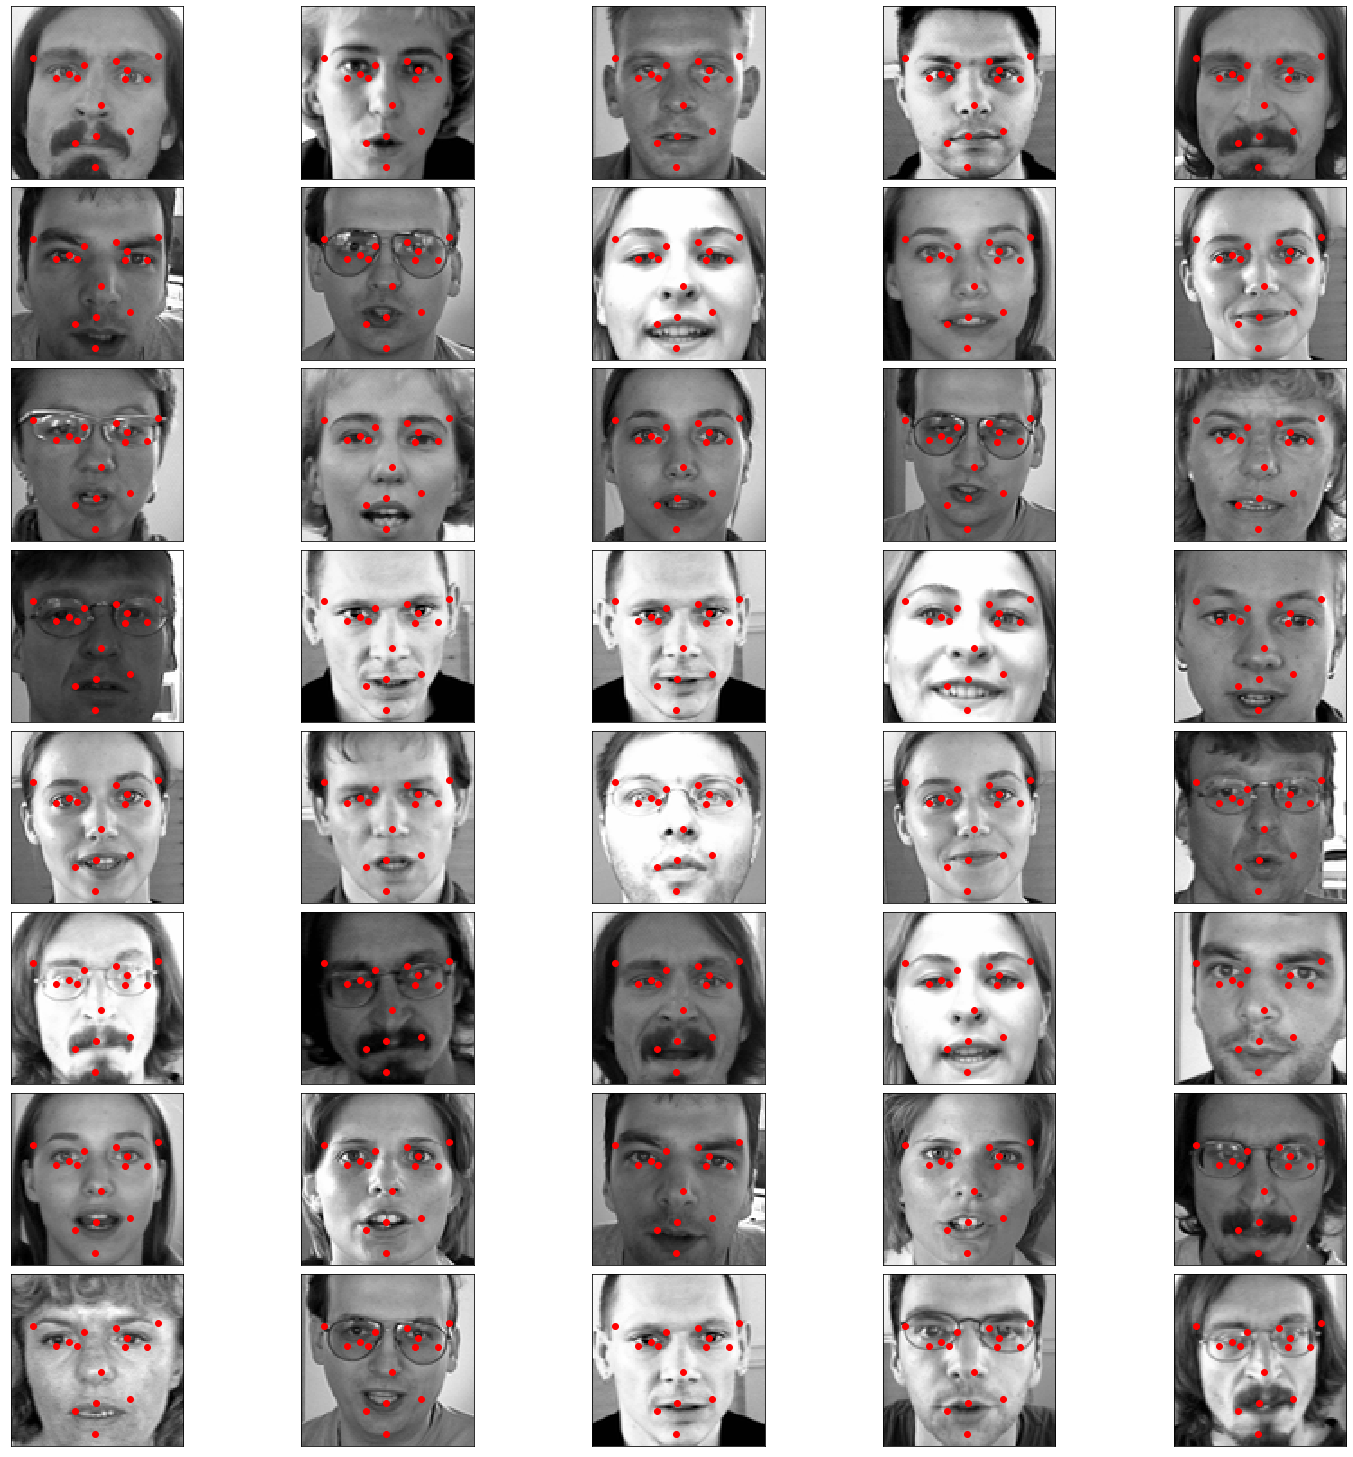

In [13]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(40):
    fig.add_subplot(8, 5, i + 1, xticks=[], yticks=[])
    image = plt.imshow(training['Image'][i], cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(training.loc[i][i-1], training.loc[i][i], 'ro'))

plt.show()

In [14]:
def mostra_img(df, index):
    image = plt.imshow(df['Image'][index], cmap='bone')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1], df.loc[index][i], 'ro'))
        
    return image, l

In [15]:
X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=42)

In [259]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [260]:
model = Sequential()

In [261]:
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [262]:
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [263]:

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 32)       

In [264]:
model.compile(optimizer='Adam', 
              loss='mse', 
              metrics=['mae'])

In [265]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
1498/1498 [==============================] - 197s 131ms/step - loss: 186.5586 - mae: 8.2564
Epoch 2/2
1498/1498 [==============================] - 206s 137ms/step - loss: 25.6334 - mae: 3.9868


In [276]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

KeyboardInterrupt: 

In [267]:
model.save('keypoint_model22.h5')

In [275]:
test['Image'][0][0]

array([182, 183, 182, 182, 180, 180, 176, 169, 156, 137, 124, 103,  79,
        62,  54,  56,  58,  48,  49,  45,  39,  37,  42,  43,  52,  61,
        78,  93, 104, 107, 114, 115, 117, 122, 120, 122, 118, 114, 115,
       118, 117, 123, 122, 122, 112, 113, 118, 125, 124, 122, 109, 101,
        96, 102, 108, 107, 100,  89,  76,  67,  58,  48,  44,  36,  32,
        21,  12,   5,  15,  21,  24,  33,  32,  41,  52,  63,  71,  90,
       106, 121, 152, 173, 180, 183, 182, 182, 183, 182, 182, 181, 182,
       182, 183, 182, 182, 182])

In [268]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [269]:
test.shape, type(test)

((1783, 2), pandas.core.frame.DataFrame)

In [270]:
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)
test_res = model.predict(test_X)

In [271]:
train_predicts = model.predict(X_train)

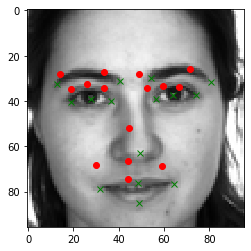

In [272]:
n = 11

xv = X_train[n].reshape((96,96))
plt.imshow(xv,cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[n][i-1], train_predicts[n][i], 'ro')
    plt.plot(y_train[n][i-1], y_train[n][i], 'x', color='green')

plt.show()

In [37]:
header = list(y.columns)

In [38]:
test_predicts = pd.DataFrame(test_res, columns = header)

In [39]:
for i in range(IdLookupTable.shape[0]):
    IdLookupTable.Location[i] = test_predicts.loc[IdLookupTable.ImageId[i]-1][IdLookupTable.FeatureName[i]]

c:\users\alexandre\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
SampleSubmission.Location = IdLookupTable.Location

In [41]:
my_submission = SampleSubmission

In [42]:
my_submission.to_csv('submission.csv', index=False)